<a href="https://colab.research.google.com/github/mens0n/hoon4IT/blob/main/Maryland_bicycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mar

# **파일 업로드**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [3]:
# 확인
!ls

sample_data  test.csv


In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf

df = pd.read_csv('test.csv')
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


# 1.Business Understanding

- 공유자전거 서비스 업계의 도메인을 이해
- 자전거라는 상품을 대여
- 대여되지 않은 자전거 대수가 적을수록 사업이 잘 된다고 판단
- 수요량을 잘 이해하고 있다면 인력이나 자원 할당의 최적화가 가능
- 요일, 날짜, 시간, 날씨에 따라 고객들의 서비스 이용량 증감 파악

# 2.Data Understanding

## Maryland 주 Washington D.C에서 자전거 공유 회사가 모은 데이터셋
* 출처: https://www.capitalbikeshare.com/system-data
* 2011~2012년도까지 2년치, 시간대별(1시간 간격)로
* 날짜정보(datetime, season, holiday, workingday)
* 기상정보(weather, temp, atemp, humidity, windspeed)
* 고객의 이용정보(casual, registered, count)
## 날짜 정보
* datetime: 년-월-일 시:분:초 정보, 분과 초는 X
* season: 계절 정보
* holiday: 해당 날짜가 휴일인지 여부
* workingday: 해당 날짜가 일하는 날인지 여부
## 기상 정보
* weather: 날씨가 험악한 정도(숫자가 커질수록 가혹함)
* temp: 온도
* atemp: 체감온도
* humidity: 습도
* windspeed: 풍속(km/h)
## 고객 정보
* casual: 비등록회원 이용객 수
* registered: 등록회원 이용객 수
* count: casual + registered

In [5]:
df.shape

(10886, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-09-09 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886,NaN,NaN,NaN,2.50661,1.11617,1,2,3,4,4
holiday,10886,NaN,NaN,NaN,0.0285688,0.166599,0,0,0,0,1
workingday,10886,NaN,NaN,NaN,0.680875,0.466159,0,0,1,1,1
weather,10886,NaN,NaN,NaN,1.41843,0.633839,1,1,1,2,4
temp,10886,NaN,NaN,NaN,20.2309,7.79159,0.82,13.94,20.5,26.24,41
atemp,10886,NaN,NaN,NaN,23.6551,8.4746,0.76,16.665,24.24,31.06,45.455
humidity,10886,NaN,NaN,NaN,61.8865,19.245,0,47,62,77,100
windspeed,10886,NaN,NaN,NaN,12.7994,8.16454,0,7.0015,12.998,16.9979,56.9969
casual,10886,NaN,NaN,NaN,36.022,49.9605,0,4,17,49,367


In [9]:
df['weather'].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [10]:
df.mean()

season          2.506614
holiday         0.028569
workingday      0.680875
weather         1.418427
temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [11]:
df['count'].mean()

191.57413191254824

In [12]:
df[['weather', 'count']].corr()

,weather,count
weather,1.000000,-0.128655
count,-0.128655,1.000000


## Visualization
- 데이터를 눈에 잘 보이도록 그림으로 표현하는 것
- 시각적인 정보를 받아들이는 눈을 이용해 데이터를 해석하고자 함
- 대상이 누구인지를 명확하게 인지해야 함(모른다면 다수)
- 좋은 시각화 자료는 직관성 + 시인성이 좋음
- 대상군(audience): stakeholder, sponsor, technical audience
- pandas, matplotlib, seaborn 등 다양한 도구로 시각화 가능

## pandas 그래프 도구
- matplotlib과 기본적으로 동일한 형식
- pandas 만든이(Wes McKinney)가 만들 때 matplotlib을 판다스에 집어넣었기 때문

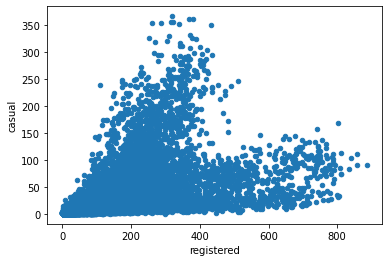

In [13]:
# 산점도(scatter) : 두 변수 간의 관계를 나타내는 그래프 방법, 산포된 점으로 그린 그림
import pandas as pd
df.plot.scatter(x = 'registered', y = 'casual')

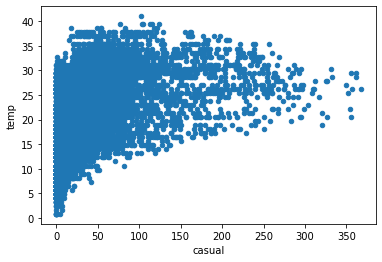

In [14]:
df.plot.scatter(x = 'casual', y = 'temp')

### matplotlib
- 1세대 그래프 그리는 도구(근본)
- pandas의 내장된 그래프 도구보다 더 다양한 기능 제공

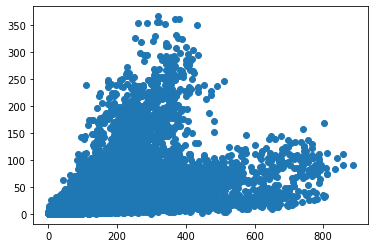

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data = df, x = 'registered', y = 'casual')

### seaborn
- matplotlib의 기능과 스타일을 확장한 파이썬 시각화 도구의 고급 버전
- 비교적 단순한 인터페이스 제공

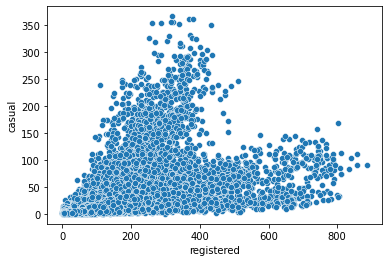

In [16]:
import seaborn as sns
sns.scatterplot(data = df, x = 'registered', y = 'casual')

#### seaborn의 hue기능
- 그래프의 색을 추가해 정보(차원)를 그래프에 반영
- hue는 그래프에 색상을 적용해 색깔의 차이를 이용해 정보를 더 넣을 수 있음
- scatterplot의 경우: 점의 산포에 색상 정보를 덧입힘

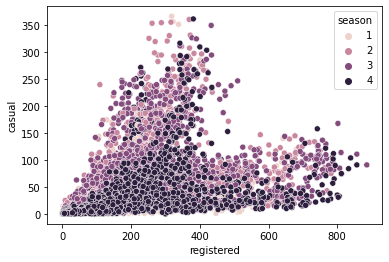

In [17]:
sns.scatterplot(data=df, x = 'registered', y = 'casual', hue = 'season')

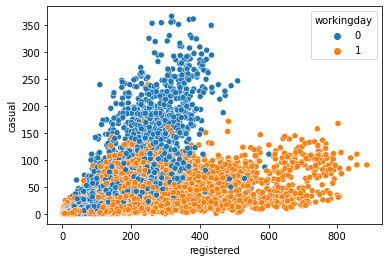

In [18]:
sns.scatterplot(data = df, x = 'registered', y = 'casual', hue = 'workingday')

## Data Exploration

### 날짜 슬라이싱

In [27]:
df['year'] = df['datetime'].apply(lambda x:int(x[:4]))
df['month'] = df['datetime'].apply(lambda x:int(x.split(' ')[0].split('-')[1]))
df['day'] = df['datetime'].apply(lambda x:int(x.split(' ')[0].split('-')[2]))
df['hour'] = df['datetime'].apply(lambda x:int(x.split(' ')[1].split(':')[0]))

In [34]:
# 여러개의 조건을 만족하는 Row를 특정하는 방법
# 2011년도 1월만 선택

# 1) 쉬운방법
year = df.loc[df['year'] == 2011]
yearmonth = year.loc[year['month'] == 1]
print(yearmonth)

# 2) 문법적인 방법
df.loc[(df['year'] == 2011) & (df['month'] == 1)]

                datetime  season  holiday  workingday  ...  year  month  day  hour
0    2011-01-01 00:00:00       1        0           0  ...  2011      1    1     0
1    2011-01-01 01:00:00       1        0           0  ...  2011      1    1     1
2    2011-01-01 02:00:00       1        0           0  ...  2011      1    1     2
3    2011-01-01 03:00:00       1        0           0  ...  2011      1    1     3
4    2011-01-01 04:00:00       1        0           0  ...  2011      1    1     4
..                   ...     ...      ...         ...  ...   ...    ...  ...   ...
426  2011-01-19 19:00:00       1        0           1  ...  2011      1   19    19
427  2011-01-19 20:00:00       1        0           1  ...  2011      1   19    20
428  2011-01-19 21:00:00       1        0           1  ...  2011      1   19    21
429  2011-01-19 22:00:00       1        0           1  ...  2011      1   19    22
430  2011-01-19 23:00:00       1        0           1  ...  2011      1   19    23

[43

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,2011-01-19 19:00:00,1,0,1,1,13.12,14.395,57,27.9993,4,108,112,2011,1,19,19
427,2011-01-19 20:00:00,1,0,1,1,13.12,15.150,49,19.9995,2,74,76,2011,1,19,20
428,2011-01-19 21:00:00,1,0,1,1,13.12,14.395,49,27.9993,4,55,59,2011,1,19,21
429,2011-01-19 22:00:00,1,0,1,1,12.30,15.150,52,11.0014,6,53,59,2011,1,19,22


In [28]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


### 요일 정보 추출

In [37]:
sample = '2022-01-04 00:00:00'
parsed = pd.to_datetime(sample)
parsed

Timestamp('2022-01-04 00:00:00')

In [38]:
# 0(월요일) ~ 6(일요일)
parsed.dayofweek

1

In [40]:
df['dayofweek'] = df['datetime'].apply(lambda x:pd.to_datetime(x).dayofweek)
df.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


### 그룹 연산
- 특정 기준으로 그룹을 분할하여 처리
- 그룹 연산은 데이터를 집계, 변환, 필터링하는데 효율적

#### df.groupby(기준이 되는 열)
-  year Column의 경우의 수 기준으로 Row들을 그룹 지음

In [43]:
year = df.groupby('year')

#### aggregation(agg)
- {'count':np.mean} -> count column에 대해 np.mean연산을 일괄 수행

In [44]:
year_count = year.agg({'count':np.mean})
year_count.reset_index()

,year,count
0,2011,144.223349
1,2012,238.560944


In [45]:
df.groupby('year').agg({'count':np.mean}).reset_index()

,year,count
0,2011,144.223349
1,2012,238.560944


In [47]:
# multi-index aggregation (2개 이상의 기준을 잡아 일괄 계산)
interested = ['year', 'season']
ys_count = df.groupby(interested).agg({'count':np.mean}).reset_index()
ys_count

,year,season,count
0,2011,1,71.905518
1,2011,2,160.940746
2,2011,3,186.994872
3,2011,4,154.787125
4,2012,1,159.476889
5,2012,2,269.601757
6,2012,3,281.735380
7,2012,4,243.189466


### 방향성에 맞는 그래프 생성, 해석

In [29]:
print(df.shape)
df.head().T

(10886, 16)


,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


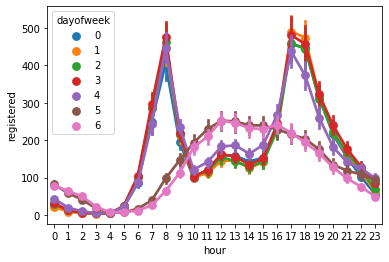

In [49]:
sns.pointplot(data=df, x = 'hour', y = 'registered', hue = 'dayofweek')


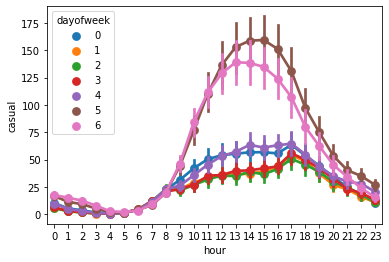

In [50]:
sns.pointplot(data = df, x = 'hour', y = 'casual', hue = 'dayofweek')

In [53]:
# 일하는 날에는 등록회원이 많이 사용하고, 일하지 않는 날에는 비등록 회원이 많이 이용한다.
# 등록회원과 비등록회원이 사용하는 빈도의 차이는 일하는 날과 일하지 않는 날의 차이이다
#-----위 그래프를 분석한 결과-----
# 등록회원 : 출근 시간대와 퇴근 시간대에 사용량이 빈번하고
# 비등록회원 : 점심 시간대에 사용량이 빈번하다
# 등록회원 : 평일 출근 시간대와 퇴근 시간대 이용량이 높고, 주말엔 상반된 결과를 보인다.
# 비등록회원 : 평일에 사용량이 낮고, 주말 점심 시간대에 이용량이 가장 높음

# 3.Data Preparation
- 데이터를 분석 모형에 넣어 학습을 진행하기 위한 준비과정
- train, test split --> Row 분리
- 문제와 정답(features, label) 분리 --> column 분리 --> 분석 방향성
- (날짜, 날씨, 시간)이 이용량(casual, registered, count)에 영향을 줄 것
- 방향성 : 요일, 날짜, 시간, 날씨에 따라 고객들의 서비스 이용량 증감

In [54]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'dayofweek'],
      dtype='object')

In [61]:
features = [ 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 
       'year', 'month', 'day', 'hour', 'dayofweek']
label = 'count'

# train, test split
# 서로 중복되는 Row가 존재하지 않게 홀, 짝으로 나눔
train, test = df[0::2], df[1::2]

# index 재설정
train, test = train.reset_index(), test.reset_index() 
X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

# 4.Modeling


## Model planning
- 지도학습의 사례 2가지(객관식, 주관식)
- 분류(Classification): 객관식(경우의 수)
- 회귀(Regression): 주관식(숫자)
- 현 데이셋은 숫자를 공부하는 것이므로 회귀문제
- 현재 분석 방향성 : 고객들의 이용량(숫자)이 label이므로 회귀문제
- 알고리즘 선택할 때 이름과 세부 설명상 수식어로 판단하는 방법: Regressor -> 회귀모델, Classifier -> 분류모델
- 단, Logistic Regression은 위 규칙에서 제외

## Model building
- 모델을 가져와 생성(학습하기 전 단계)
- 모델 학습(학습용 데이터 이용)
- 평가지표 적용(학습용 시험용 둘 다 적용)

#### sklearn 
- ML 계열 성향이 짙은 알고리즘을 활용하는 파이썬 라이브러리
- 정형 데이터, DataFrame, Excel 형태의 데이터 -> ML 계열 알고리즘
- 이미지, 영상, 음성, 사람이 사용하는 글 -> DL 계열 알고리즘


### RandomForesetRegressor


In [62]:
from sklearn.ensemble import RandomForestRegressor as rf

# 알고리즘 생성해 model 변수로 사용
model = rf()

# fitting(적합, 학습, fit처럼 다양하게 표현)
# 문제집을 가지고 학습하는 개념으로 문제(X_train)와 답지(y_train)가 필요
model.fit(X_train, y_train)

# 시험후 점수 확인
# train, test 문제(X_) 풀고, 정답지(y_) 이요해 점수 확인
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# R-Squared(R2) 라는 평가지표를 사용
print(train_score, test_score)



0.9999241372413996 0.9989228928878061


## 결정계수
- 회귀 분석이 얼마나 잘 되었는지 평가하는 지표
- 회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가? 에 대한 점수
- 회귀에서는 예측하는 값이나 타깃이 임의의 수치이므로 정확한 숫자를 맞힌다는 것은 거의 불가능 함
- R2는 0~1 사이의 값을 갖고, 1에 가까울수록 예측력이 좋다고 판단(데이터를 잘 설명하는 모델)
- 1이면 100% 정답으로 맞춘 것(오차 X)
- 샘플의 타깃과 예측한 값의 차이를 제곱하여 더함
- 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눔
- 타깃의 평균 정도를 예측하는 수준이라면(분자와 분모가 비슷하다면) R2는 0에 가까워지고,
- 예측이 타깃에 가까워지면(분자가 0에 가까워지기 때문에) 1에 가까운 값이 됨